In [863]:
import numpy as np
import pandas as pd

In [864]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2024-10-09 19:28:07--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  5.92MB/s    in 0.2s    

2024-10-09 19:28:08 (5.92 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [865]:
df = pd.read_csv(data)

In [866]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [867]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# 2.2 Data preparation
- column name standardization
- data value standardization
  

In [868]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [869]:
# columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [870]:
# data
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [871]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [872]:
str_cols = list(df.dtypes[df.dtypes == 'object'].index)
str_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [873]:
for col in str_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [874]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 EDA

In [875]:
# For each col print some data, uniq, num uniques

In [876]:
for col in df.columns:
    print(df[col].head(2))
    print(df[col].nunique())

0    bmw
1    bmw
Name: make, dtype: object
48
0    1_series_m
1      1_series
Name: model, dtype: object
914
0    2011
1    2011
Name: year, dtype: int64
28
0    premium_unleaded_(required)
1    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object
10
0    335.0
1    300.0
Name: engine_hp, dtype: float64
356
0    6.0
1    6.0
Name: engine_cylinders, dtype: float64
9
0    manual
1    manual
Name: transmission_type, dtype: object
5
0    rear_wheel_drive
1    rear_wheel_drive
Name: driven_wheels, dtype: object
4
0    2.0
1    2.0
Name: number_of_doors, dtype: float64
3
0    factory_tuner,luxury,high-performance
1                       luxury,performance
Name: market_category, dtype: object
71
0    compact
1    compact
Name: vehicle_size, dtype: object
3
0          coupe
1    convertible
Name: vehicle_style, dtype: object
16
0    26
1    28
Name: highway_mpg, dtype: int64
59
0    19
1    19
Name: city_mpg, dtype: int64
69
0    3916
1    3916
Name: popularity, dtype: int64
48
0

In [877]:
# Distribution of price

In [878]:
import matplotlib.pyplot as plt
import seaborn as sns

In [879]:
# Histogram of price, with bins : 50 or 10 (result: long tail distribution)

<Axes: xlabel='msrp', ylabel='Count'>

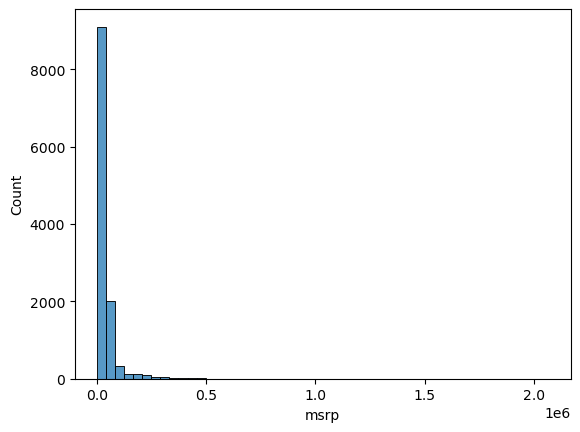

In [880]:
sns.histplot(df['msrp'], bins=50)

In [881]:
# Zoom in to see prices less than 1 Million

<Axes: xlabel='msrp', ylabel='Count'>

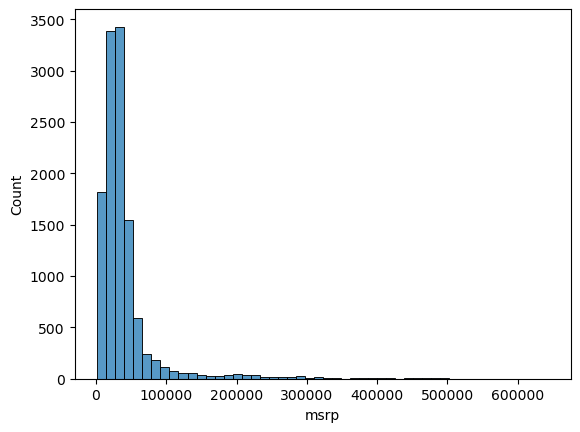

In [882]:
sns.histplot(df[df['msrp'] < 1000000].msrp, bins=50)

In [883]:
# => Not good for ML. Get rid of the long tail 
# Apply a log distribution and try

In [884]:
np.log(0)

/var/folders/zn/nr4dngtd7r9046m_s7578mjh0000gq/T/ipykernel_9650/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [885]:
np.log1p(0) # adds 1 manually 

np.float64(0.0)

In [886]:
# price_logs 

<Axes: xlabel='msrp', ylabel='Count'>

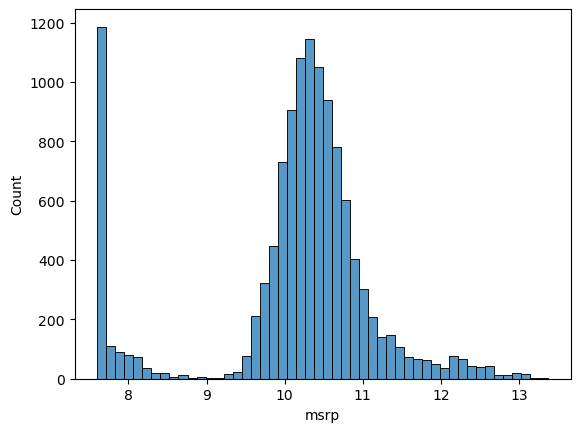

In [888]:
price_logs = np.log1p(df[df['msrp'] < 1000000].msrp)
sns.histplot(price_logs, bins=50)

In [889]:
# => Normal distribution . Ideal for ML

In [890]:
## Missing values

In [891]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [892]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Validation Framework


In [893]:
## Setup Split 60/20/20 (with shuffling)

In [894]:
# Determine len, and get to know the split. 

In [895]:
n = len(df)
n

11914

In [896]:
# n_train = int(.6 * n)
n_test = int(.2 * n)
n_val = int(.2 * n)
n_train = n - n_val - n_test

In [897]:
n_train + n_test + n_val

11914

In [898]:
df[:n_train].head(10) # data might be ordered ; so better to shuffle it and then do the split.

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [899]:
# idx shuffle and generate df_train, df_val, df_test


In [900]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [901]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [902]:
X_train = df.iloc[idx[:n_train]]
X_val = df.iloc[idx[n_train: n_train + n_val]]
X_test = df.iloc[idx[n_train + n_val: n_train + n_val +n_test]]

In [903]:
X_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [904]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

len(X_train), len(X_val), len(X_test)

(7150, 2382, 2382)

In [905]:
y_train = X_train.pop('msrp')
y_val = X_val.pop('msrp')
y_test = X_test.pop('msrp')


In [906]:
X_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [907]:
y_train[:2], y_val[:2], y_test[:2]

(0    14410
 1    19685
 Name: msrp, dtype: int64,
 0    26885
 1    54650
 Name: msrp, dtype: int64,
 0    2000
 1    3211
 Name: msrp, dtype: int64)

In [908]:
# Apply log to y (msrp)

In [909]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [910]:
y_train.head()

0     9.575747
1     9.887663
2     9.893235
3     7.601402
4    10.937757
Name: msrp, dtype: float64

# 2.5 Linear Regression

 $$ y = b + \sum_{i=1}^n wx_i$$
 $$ g(x_i) = w_0 + \sum_{i=1}^n {x_{ij} * w_j} $$

In [911]:
def linear_regression(w, x, b):
    res = b
    for j in range(len(x)):
        res += w[j] * x[j]
    return res
    

In [912]:
# look at one example
# Consider the feature set: engine_hp, city_mpg, popularity
x10 = np.array(X_train.iloc[10][['engine_hp', 'city_mpg', 'popularity']])
x10

array([np.float64(453.0), np.int64(11), np.int64(86)], dtype=object)

In [913]:
# weights determination

In [914]:
w = [.01, .04, .002]
b = 7.17

In [915]:
y10 = linear_regression(w, x10, b)
print(y10)

12.312


In [916]:
# Apply np.expm1(iv) to undo np.log1p(v)

In [917]:
ex_y10 = np.expm1(y10)
print(ex_y10)

222347.2221101062


# 2.6 Vector form

In [918]:
# consider all examples
# Matrix X 

$$ W = [ w_0, w_1, w_2 ... w_n] $$
$$ X_i = [1, X_{i1}, X_{i2} ... X_{in}] $$
$$ W^T X_i = X_i^T W $$

In [919]:
w_new = [b] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [920]:
x10l = x10.astype('int64').tolist()
x10l
[1] + x10l

[1, 453, 11, 86]

In [921]:
def linear_regression_2(xi):
    xi = [1] + xi
    return np.dot(xi,w_new)

In [922]:
linear_regression_2(x10l)

np.float64(12.312)

In [923]:
# Matrix Vector multiplication

In [924]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 2031],
       [   1,  453,   11,   86]])

In [925]:
def linear_regression_3(X, w):
    return X.dot(w)

In [926]:
linear_regression_3(X, w_new)

array([12.38 , 13.512, 12.312])

In [765]:
# Linear Regression function

def linear_regression_final(X_mat, w_vec, b_sca):
    return X_mat.dot(w_vec) + b_sca

# 2.7 Training

$$ Xw = y $$

### Solve for w
$$ w = (X^T X)^{-1} X^T y $$

In [766]:
X = [
       [148,   24, 1385],
       [132,   24, 2031],
       [453,   11,   86],
       [158,   24, 1385],
       [343,   24, 2031],
       [221,   25,   223],
       [45,   22, 234],
       [261,   52, 2455],
       [255,   1,   186]
]

In [767]:
X_orig = np.array(X)
X_orig
X = X_orig.copy()

In [768]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [769]:
X = np.column_stack([ones, X])
X.tolist()

[[1.0, 148.0, 24.0, 1385.0],
 [1.0, 132.0, 24.0, 2031.0],
 [1.0, 453.0, 11.0, 86.0],
 [1.0, 158.0, 24.0, 1385.0],
 [1.0, 343.0, 24.0, 2031.0],
 [1.0, 221.0, 25.0, 223.0],
 [1.0, 45.0, 22.0, 234.0],
 [1.0, 261.0, 52.0, 2455.0],
 [1.0, 255.0, 1.0, 186.0]]

In [770]:
y = [12200, 22100, 15000, 28200, 10000, 19600, 15000, 25500, 12100]

In [771]:
# Gram matrix
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)

In [772]:
# check inv
XTX_inv.dot(XTX).round(1)

array([[ 1., -0., -0., -0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [773]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 1.38958598e+04, -8.58738638e+00,  2.71118223e+02, -4.16537442e-01])

In [774]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [775]:
train_linear_regression(X_orig, y)

(np.float64(13895.859753723511),
 array([ -8.58738638, 271.11822314,  -0.41653744]))

In [776]:
# 2.8 Baseline car price model


In [777]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [778]:
X_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [779]:
base_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] 


In [780]:
X_tr = X_train[base_features]
X_tr.head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657


In [781]:
X_tr.shape

(7150, 5)

In [782]:
y_tr = y_train.copy()
y_tr.head()

0     9.575747
1     9.887663
2     9.893235
3     7.601402
4    10.937757
Name: msrp, dtype: float64

In [783]:
y_tr.shape

(7150,)

In [784]:
train_linear_regression(X_tr, y_tr)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [785]:
# => Check for null values

In [786]:
np.isnan(X_tr).sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [787]:
# => for now, we replace all the ones with 0 
X_tr.fillna(0, inplace=True)
np.isnan(X_tr).sum()

/var/folders/zn/nr4dngtd7r9046m_s7578mjh0000gq/T/ipykernel_9650/88558734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr.fillna(0, inplace=True)


engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [788]:
w0, w = train_linear_regression(X_tr, y_tr)
(w0, w)

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [789]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [790]:
# Plot predictions vs actual

In [791]:
y_tr_pred = linear_regression_final(X_tr, w, w0)
y_tr_pred

0        9.547928
1        9.387340
2        9.671978
3        8.654388
4       10.866020
          ...    
7145    10.593528
7146    10.111199
7147    10.304230
7148    11.977891
7149     9.998631
Length: 7150, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

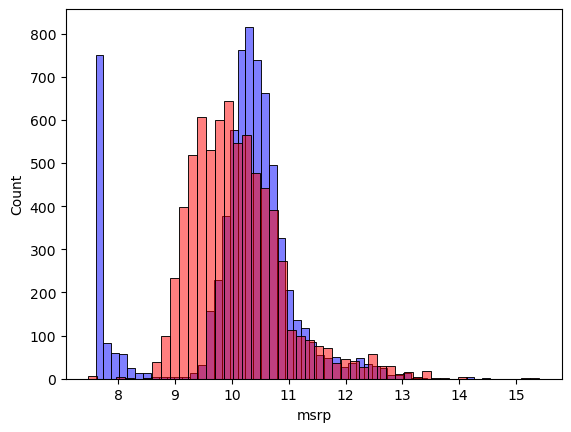

In [792]:
sns.histplot(y_tr, color='blue', alpha=0.5, bins=50)
sns.histplot(y_tr_pred, color='red', alpha=0.5, bins=50)

In [793]:
# RMSE 

$$ RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^m (g(x_i) - y_i)^2} $$

In [794]:
def rmse(y, y_pred):
    se = (y_pred - y) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)
    

In [795]:
rmse(y_tr, y_tr_pred)

np.float64(0.7554192603920132)

In [796]:
# 2.10 Validating the model


In [797]:
base_features

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [798]:
def prepare_X(df):
    df_base = df[base_features]
    df_base = df_base.fillna(0)
    return df_base.values


In [799]:
X_tr = prepare_X(X_train)
w0, w = train_linear_regression(X_tr, y_tr)

X_v = prepare_X(X_val)
y_pred = linear_regression_final(X_v, w, w0)

rmse(y_val, y_pred)

np.float64(0.761653099130156)

# 2.11 Simple feature engineering


In [800]:
df.head() 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [801]:
# One of the most important feature is year. Let us add it to the train ds by using it as a age.

In [802]:
df.year.max()

np.int64(2017)

In [803]:


def prepare_X2(df_orig):
    df = df_orig.copy()

    df['age'] = 2017 - df.year
    features = base_features + ['age']
    df_work = df[features]
    
    df_work = df_work.fillna(0)
    return df_work.values
    

In [804]:
X_tr = prepare_X2(X_train)
w0, w = train_linear_regression(X_tr, y_tr)

X_v = prepare_X2(X_val)
y_val_pred = linear_regression_final(X_v, w, w0)

rmse(y_val, y_val_pred)

np.float64(0.5172055461058299)

<Axes: xlabel='msrp', ylabel='Count'>

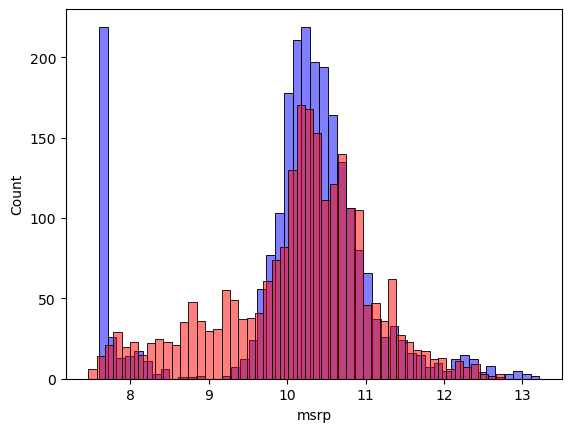

In [805]:
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val_pred, color='red', alpha=0.5, bins=50)


# 2.12 Categorical vars

In [807]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [808]:
# Consider number_of_doors
X_train.number_of_doors.value_counts()

number_of_doors
4.0    5000
2.0    1916
3.0     228
Name: count, dtype: int64

In [809]:
# Derive separate features for every categorical val (OneHotEncoding)
(X_train.number_of_doors == 3).astype('int')

0       0
1       0
2       0
3       1
4       0
       ..
7145    0
7146    0
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [810]:
nod_vals = X_train.number_of_doors.unique()
nod_vals

array([ 2.,  4.,  3., nan])

In [811]:
def prepare_X3(df_orig):
    df = df_orig.copy()
    features = base_features.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for nd in df.number_of_doors.dropna().unique().astype('int'):
        df[f'nod_{nd}'] = (df.number_of_doors == nd).astype('int')
        features.append(f'nod_{nd}')
        
    df_work = df[features]
    df_work = df_work.fillna(0)

    # print(df_work.head())
        
    return df_work.values

In [812]:
prepare_X3(X_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   1.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   1.,   0.],
       [563.,  12.,  21., ...,   0.,   1.,   0.],
       [200.,   4.,  31., ...,   0.,   1.,   0.]])

In [813]:
X_tr = prepare_X3(X_train)
w0, w = train_linear_regression(X_tr, y_tr)

X_v = prepare_X3(X_val)
y_val_pred = linear_regression_final(X_v, w, w0)

rmse(y_val, y_val_pred)

np.float64(0.5174578807554581)

In [814]:
# > Neglible change

In [815]:
df.make.nunique()

48

In [816]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [817]:
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [818]:
def prepare_X4(df_orig):
    df = df_orig.copy()
    features = base_features.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for nd in df.number_of_doors.dropna().unique().astype('int'):
        df[f'nod_{nd}'] = (df.number_of_doors == nd).astype('int')
        features.append(f'nod_{nd}')

    for make in df.make.value_counts().head().index:
        df[f'make_{make}'] = (df.make == make).astype('int')
        features.append(f'make_{make}')

        
    df_work = df[features]
    df_work = df_work.fillna(0)

    # print(df_work.head())
        
    return df_work.values

In [819]:
prepare_X4(X_train)

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.]])

In [820]:
X_tr = prepare_X4(X_train)
w0, w = train_linear_regression(X_tr, y_tr)

X_v = prepare_X4(X_val)
y_val_pred = linear_regression_final(X_v, w, w0)

rmse(y_val, y_val_pred)

np.float64(0.5093201113939774)

In [821]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [822]:
list(X_train['make'].value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [823]:
# top categories can be one hot encoded for the remaining categorical values

cat_cols = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

categorical = {}

for c in cat_cols:
    categorical[c] = list(X_train[c].value_counts().head().index)


In [824]:
categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [825]:
def prepare_X5(df_orig):
    df = df_orig.copy()
    features = base_features.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    #for nd in df.number_of_doors.dropna().unique().astype('int'):
    for nd in [2, 3, 4]:
        df[f'nod_{nd}'] = (df.number_of_doors == nd).astype('int')
        features.append(f'nod_{nd}')

    for name, values in categorical.items():
        for value in values:
            df[f'{name}_{value}'] = (df[name] == value).astype(int)
            features.append(f'{name}_{value}')
        
    df_work = df[features]
    df_work = df_work.fillna(0)

    # print(df_work.head())
        
    return df_work.values

In [826]:
X_tr = prepare_X5(X_train)
w0, w = train_linear_regression(X_tr, y_tr)

X_v = prepare_X5(X_val)
y_val_pred = linear_regression_final(X_v, w, w0)

rmse(y_val, y_val_pred)

np.float64(53.70545993470668)

In [827]:
w  # weights too high.

array([ 1.97815705e-01,  3.59996839e+00,  1.77430262e-01,  2.54401440e+00,
       -3.91209144e-04,  1.31841741e+00, -1.87629844e+03, -1.87912990e+03,
       -1.87135179e+03, -3.16525752e+00,  8.11185787e-01,  8.76573747e+00,
       -7.26348843e+00, -5.87324602e+00, -3.43160292e+01, -2.49085861e+01,
       -4.50399871e+01, -2.85752551e+01,  9.63377197e+00,  3.79004788e+02,
        3.54982604e+02,  3.73756735e+02,  4.23480737e+02,  3.19067990e+02,
       -1.20883643e+14, -1.20883643e+14, -1.20883643e+14, -1.20883643e+14,
       -2.07609706e-01, -6.37629899e-01, -4.67620395e-01,  2.49283098e+01,
        4.01327473e+00, -2.32017237e+01, -2.26915593e+01, -5.85429953e+00,
       -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
       -2.90235596e-01])

In [828]:
# => Unusually high RMSE, weights.. when including all the categorical features. 

# 2.13 Regularization


#### The problem is with the gram matrix 
$$ w = (X^T X)^{-1} . X^T . y $$

In [829]:
# the inverse doesn't exist

In [830]:
# example
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]
X = np.array(X)
X


array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [831]:
# => second and third have the same values. duplicate cols

In [832]:
# gram matrix
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [833]:
# so in linear algrebra , the inverse doesn't exist .. (singular)

In [834]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [835]:
# but if we have a minor diff.. we can see the error we are facing

X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.001]
]
X = np.array(X)
X

array([[4.   , 4.   , 4.   ],
       [3.   , 5.   , 5.   ],
       [5.   , 1.   , 1.   ],
       [5.   , 4.   , 4.   ],
       [7.   , 5.   , 5.   ],
       [4.   , 5.   , 5.001]])

In [836]:
XTX = X.T.dot(X)
np.linalg.inv(XTX)

array([[ 4.12729985e-02, -6.12088502e+01,  6.11635991e+01],
       [-6.12088502e+01,  1.39209949e+06, -1.39197213e+06],
       [ 6.11635991e+01, -1.39197213e+06,  1.39184483e+06]])

In [837]:
# => computes the inverse now, but with a higher val

In [838]:
# Soln add a small 'alpha' to the diagonal

XTX = [
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]

In [839]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [840]:
XTX = XTX + 0.01 * np.eye(3)
np.linalg.inv(XTX)

array([[ -0.33668906,   0.33501399,   0.33501399],
       [  0.33501399,  49.91540897, -50.08459103],
       [  0.33501399, -50.08459103,  49.91540897]])

In [841]:

def train_linear_regression_reg(X, y, r=.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) 
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [842]:
X_tr = prepare_X5(X_train)
w0, w = train_linear_regression_reg(X_tr, y_tr)

X_v = prepare_X5(X_val)
y_val_pred = linear_regression_final(X_v, w, w0)

rmse(y_val, y_val_pred)

np.float64(0.46082082865518853)

<Axes: xlabel='msrp', ylabel='Count'>

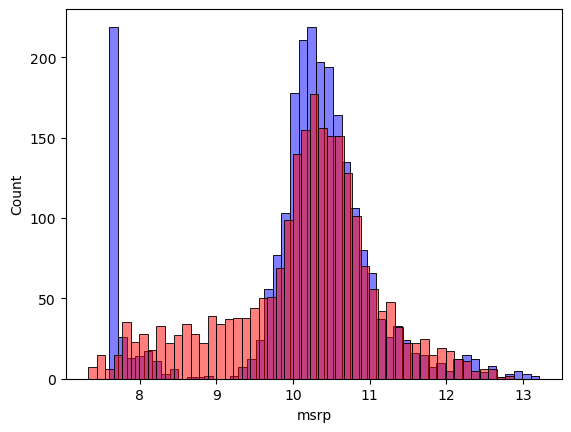

In [843]:
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val_pred, color='red', alpha=0.5, bins=50)

# 2.14 Tuning
### Best Regularization param

In [844]:
for reg in [0, .00001, .0001, .001, .1, 1, 10]:
    X_tr = prepare_X5(X_train)
    w0, w = train_linear_regression_reg(X_tr, y_tr, r=reg)
    
    X_v = prepare_X5(X_val)
    y_val_pred = linear_regression_final(X_v, w, w0)
    
    score = rmse(y_val, y_val_pred)
    print(reg, w0, score)

0 120883643437600.25 53.70545993470668
1e-05 8.377536683531915 0.46081532306190714
0.0001 7.139523156766516 0.46081536558173836
0.001 7.1309028247366735 0.46081585855400226
0.1 7.000232409563553 0.46087365490950694
1 6.25074784766319 0.46158128382736374
10 4.729512585705947 0.4726098772668833


In [845]:
# => for 0.001 we have the best score


In [846]:
r = 0.001
X_tr = prepare_X5(X_train)
w0, w = train_linear_regression_reg(X_tr, y_tr, r=r)

X_v = prepare_X5(X_val)
y_val_pred = linear_regression_final(X_v, w, w0)

score = rmse(y_val, y_val_pred)
score

np.float64(0.46081585855400226)

# 2.15 Using the model

In [847]:
df_full_train = pd.concat([X_train, X_val]).reset_index(drop=True)
df_full_train.shape

(9532, 15)

In [848]:
X_full_train = prepare_X5(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [849]:
X_full_train.shape

(9532, 41)

In [850]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [851]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [852]:
w0

np.float64(7.17549017669276)

In [853]:
w

array([ 1.80193322e-03,  1.26575153e-01, -6.78607785e-03,  7.75903990e-03,
       -5.33226048e-05, -9.73063830e-02, -1.27241421e+00, -1.30598989e+00,
       -9.95967553e-01, -6.27479247e-02,  1.82139250e-01,  2.83073979e-02,
        1.29063878e-02, -1.32624473e-01, -2.69110366e-01, -6.50985204e-01,
       -3.21721815e-01, -3.55424923e-01, -3.51216089e-01, -6.61059021e-01,
       -1.19526922e-01, -5.15904822e-01, -6.99730857e-01, -3.25276702e-01,
        1.80617135e+00,  1.75048506e+00,  1.82805757e+00,  1.78992602e+00,
       -5.47616417e-02,  1.19033258e-01, -2.65289030e-02,  7.42028752e-03,
       -7.49067111e-03,  2.42691855e+00,  2.35931701e+00,  2.38908622e+00,
       -1.47584145e-01, -2.46551739e-02,  1.81542645e-01,  3.55084073e-01,
       -2.79089708e-01])

In [854]:
X_te = prepare_X5(X_test)
y_te_pred = linear_regression_final(X_te, w, w0)

score = rmse(y_test, y_te_pred)
score

np.float64(0.4600753970082232)

<Axes: xlabel='msrp', ylabel='Count'>

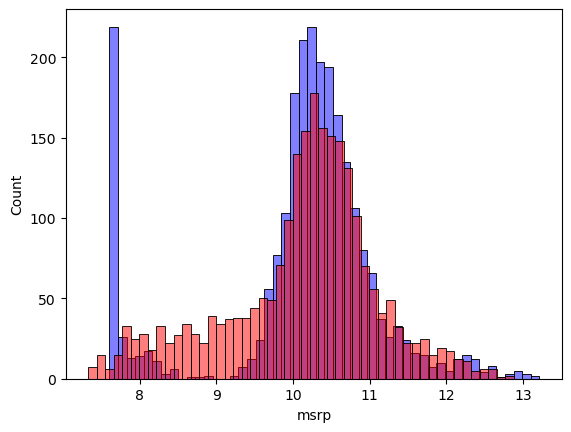

In [855]:
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val_pred, color='red', alpha=0.5, bins=50)

In [856]:
# Apply it to a new car or test it.

In [857]:
car = X_test.iloc[5]
car

make                                           audi
model                                            a3
year                                           2015
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     220.0
engine_cylinders                                4.0
transmission_type                  automated_manual
driven_wheels                       all_wheel_drive
number_of_doors                                 2.0
market_category                              luxury
vehicle_size                                compact
vehicle_style                           convertible
highway_mpg                                      32
city_mpg                                         23
popularity                                     3105
Name: 5, dtype: object

In [858]:
car_df = pd.DataFrame([car])
car_df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
5,audi,a3,2015,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,32,23,3105


In [859]:
car_df.shape

(1, 15)

In [860]:
prep_car_df = prepare_X5(car_df)
prep_car_df.shape

(1, 41)

In [861]:
prep_car_df = prepare_X5(car_df)

# car_pred = linear_regression_final(prep_car_df, w, w0)
car_pred = w0 + prep_car_df.dot(w)
price = np.expm1(car_pred[0])
price

np.float64(35402.01710093008)

In [862]:
np.expm1(y_test[5])

np.float64(41149.999999999985)